In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [15]:
df = pd.read_csv("preprocessed_data.csv")

In [16]:
# only use books after 01.02. (17 weeks ago) until today
df_copy = df.copy()
mask = (df["age"] < (17*7)) & (df["age"] > 0)
df = df[mask]

In [17]:
# drop duplicates
df = df.drop_duplicates(subset=['title','author'], keep='last')

## Popular Books
To be a popular book a book should have more than mean ratings

In [18]:
df_moreThanMeanRatings = df[df["num_ratings"] > df.num_ratings.mean()]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_ratings,avg_rating,num_reviews
2755,Heartstopper: Volume Three,13001,4.67,2353
2771,The Girl with the Louding Voice,11353,4.50,1654
2433,House of Earth and Blood,44850,4.47,9201
2463,Smoke Bitten,11405,4.47,1472
2492,In An Instant,22137,4.40,2344
2479,The Holiness of God,15842,4.38,606
2718,A Good Girl's Guide to Murder,16834,4.36,3390
2785,The Splendid and the Vile: A Saga of Churchill...,15910,4.32,2341
2776,Angry God,15378,4.32,2498
2497,Untamed,31306,4.31,3939


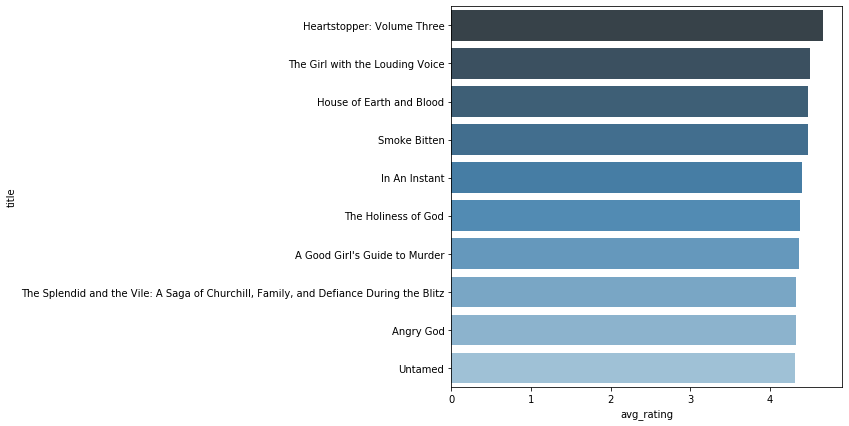

In [19]:
df_moreThanMeanRatings.sort_values(by="avg_rating", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="avg_rating", y="title", data=df_moreThanMeanRatings.head(10), palette="Blues_d")
df_moreThanMeanRatings.head(10)[["title","num_ratings","avg_rating","num_reviews"]]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_ratings,num_reviews,avg_rating
2302,The Annotated American Gods,729111,37499,4.11
2493,Little Fires Everywhere,586739,45451,4.10
2457,The Woman in the Window,390948,38062,3.94
2689,All the Bright Places,269451,31176,4.17
2748,Normal People,267146,23922,3.87
2167,Defending Jacob,246561,20041,3.98
2762,Daisy Jones & The Six,208790,31932,4.21
2105,The Angel Experiment,201702,9240,4.08
2239,The Iron King,182895,11616,3.90
2283,City of Girls,114266,12217,4.05


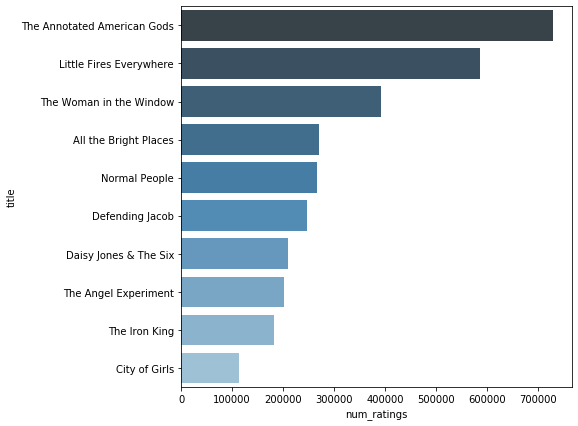

In [62]:
df_moreThanMeanRatings.sort_values(by="num_ratings", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_ratings", y="title", data=df_moreThanMeanRatings.head(10), palette="Blues_d")
df_moreThanMeanRatings.head(10)[["title","num_ratings","num_reviews","avg_rating"]]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_reviews,num_ratings,avg_rating
2493,Little Fires Everywhere,45451,586739,4.10
2457,The Woman in the Window,38062,390948,3.94
2302,The Annotated American Gods,37499,729111,4.11
2762,Daisy Jones & The Six,31932,208790,4.21
2689,All the Bright Places,31176,269451,4.17
2748,Normal People,23922,267146,3.87
2167,Defending Jacob,20041,246561,3.98
2288,The Turn of the Key,12717,93751,3.95
2283,City of Girls,12217,114266,4.05
2453,Recursion,11859,80574,4.18


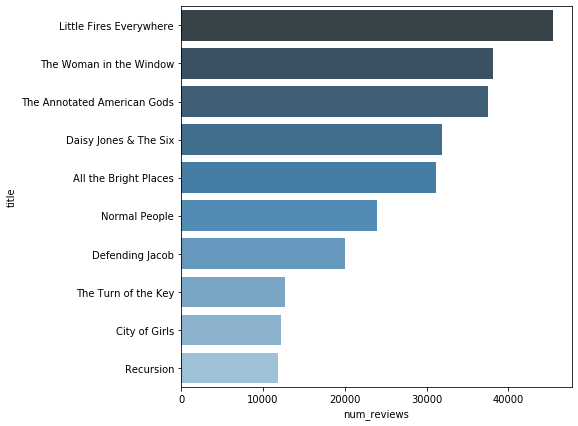

In [21]:
df_moreThanMeanRatings.sort_values(by="num_reviews", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_reviews", y="title", data=df_moreThanMeanRatings.head(10), palette="Blues_d")
df_moreThanMeanRatings.head(10)[["title","num_reviews","num_ratings","avg_rating"]]

## Popular authors

In [22]:
authors = df_moreThanMeanRatings.author.drop_duplicates()

In [23]:
df_authors ={}
for author in authors:
    df_authors[author] = df_moreThanMeanRatings[df_moreThanMeanRatings["author"] == author]

In [24]:
avg_author_rating = []
num_author_reviews = []
num_author_ratings = []
num_books = []

for author in authors:
    avg_author_rating.append(df_authors[author].avg_rating.mean())
    num_author_reviews.append(df_authors[author].num_reviews.sum())
    num_author_ratings.append(df_authors[author].num_ratings.sum())
    num_books.append(df_authors[author].title.count())

author_rating = {'author': authors, 'average_rating': avg_author_rating, 'num_reviews': num_author_reviews, 'num_ratings': num_author_ratings, "num_books": num_books}
author_rating = pd.DataFrame.from_dict(author_rating)

,author,average_rating,num_reviews,num_ratings,num_books
2493,Celeste Ng,4.10,45451,586739,1
2457,A.J. Finn,3.94,38062,390948,1
2302,Neil Gaiman,4.11,37499,729111,1
2762,Taylor Jenkins Reid,4.21,31932,208790,1
2689,Jennifer Niven,4.17,31176,269451,1
2748,Sally Rooney,3.87,23922,267146,1
2167,William Landay,3.98,20041,246561,1
2288,Ruth Ware,3.95,12717,93751,1
2283,Elizabeth Gilbert,4.05,12217,114266,1
2453,Blake Crouch,4.18,11859,80574,1


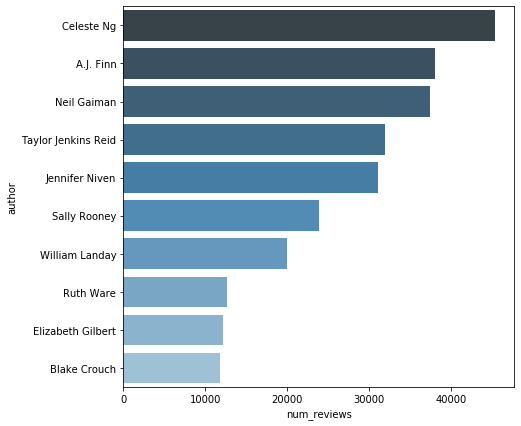

In [25]:
author_rating.sort_values(by="num_reviews", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_reviews", y="author", data=author_rating.head(10), palette="Blues_d")
author_rating.head(10)

,author,average_rating,num_reviews,num_ratings,num_books
2302,Neil Gaiman,4.11,37499,729111,1
2493,Celeste Ng,4.10,45451,586739,1
2457,A.J. Finn,3.94,38062,390948,1
2689,Jennifer Niven,4.17,31176,269451,1
2748,Sally Rooney,3.87,23922,267146,1
2167,William Landay,3.98,20041,246561,1
2762,Taylor Jenkins Reid,4.21,31932,208790,1
2105,James Patterson,4.08,9240,201702,1
2239,Julie Kagawa,3.90,11616,182895,1
2283,Elizabeth Gilbert,4.05,12217,114266,1


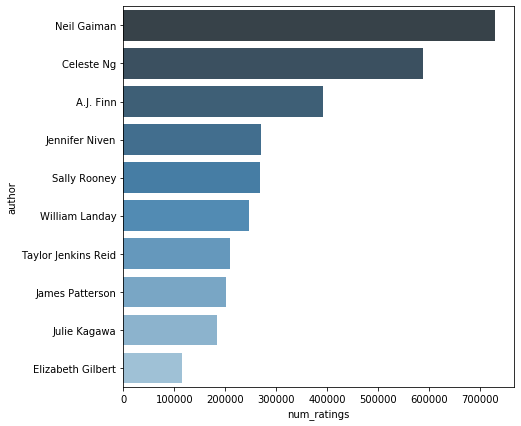

In [26]:
author_rating.sort_values(by="num_ratings", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_ratings", y="author", data=author_rating.head(10), palette="Blues_d")
author_rating.head(10)

author_rating.sort_values(by="average_rating", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="average_rating", y="author", data=author_rating.head(10), palette="Blues_d")
author_rating.head(10)

Scatter plot num_ratings vs average_rating


## Popular Genres

In [27]:
genres = ['Fiction',
       'Contemporary', 'Romance', 'Mystery', 'Young Adult', 'Fantasy',
       'Audiobook', 'Thriller', 'Adult', 'Historical', 'Historical Fiction',
       'Nonfiction', 'Mystery Thriller', 'Contemporary Romance', 'Suspense',
       'Adult Fiction', 'Science Fiction', 'Crime', 'Womens Fiction', 'LGBT',
       'Chick Lit', 'Cultural', 'Autobiography', 'Paranormal', 'Memoir',
       'Literary Fiction', 'New Adult', 'War', 'Biography', 'Magic']

In [28]:
df_genres ={}
for genre in genres:
    df_genres[genre] = df[df[genre] == 1]

In [66]:
print(df_genres['Fiction'].shape[0])
print(df_genres['Fiction'].count())

363
Unnamed: 0              363
url                     363
title                   363
author                  363
num_ratings             363
num_reviews             363
avg_rating              363
num_pages               356
language                241
publish_date            363
genres                  363
series                   92
rating_histogram        363
awards                   28
age                     363
Fiction                 363
Contemporary            363
Romance                 363
Mystery                 363
Young Adult             363
Fantasy                 363
Audiobook               363
Thriller                363
Adult                   363
Historical              363
Historical Fiction      363
Nonfiction              363
Mystery Thriller        363
Contemporary Romance    363
Suspense                363
Adult Fiction           363
Science Fiction         363
Crime                   363
Womens Fiction          363
LGBT                    363
Chick Lit       

In [69]:
avg_genre_rating = []
num_genre_reviews = []
num_genre_ratings = []
num_books_genre = []

for genre in genres:
    avg_genre_rating.append(df_genres[genre].avg_rating.mean())
    num_genre_reviews.append(df_genres[genre].num_reviews.sum())
    num_genre_ratings.append(df_genres[genre].num_ratings.sum())
    num_books_genre.append(df_genres[genre].shape[0])
genre_rating = {'genre': genres, 'average_rating': avg_genre_rating, 'num_reviews': num_genre_reviews, 'num_ratings': num_genre_ratings, 'num_books': num_books_genre}
genre_rating = pd.DataFrame.from_dict(genre_rating)

In [71]:
genre_rating['num_reviews_norm'] = genre_rating['num_reviews'] / genre_rating['num_books']
genre_rating['num_ratings_norm'] = genre_rating['num_ratings'] / genre_rating['num_books']

,genre,average_rating,num_reviews,num_ratings,num_books,num_reviews_norm,num_ratings_norm
6,Audiobook,3.993918,327162,3200462,97,3372.804124,32994.453608
17,Crime,4.007576,88063,857999,33,2668.575758,25999.969697
15,Adult Fiction,3.927077,152601,1404242,65,2347.707692,21603.723077
16,Science Fiction,3.968205,83052,1158290,39,2129.538462,29699.743590
14,Suspense,3.957292,100462,907768,48,2092.958333,18911.833333
23,Paranormal,4.072000,31330,437727,15,2088.666667,29181.800000
12,Mystery Thriller,3.875897,152299,1109194,78,1952.551282,14220.435897
7,Thriller,3.898241,186880,1481977,108,1730.370370,13722.009259
25,Literary Fiction,3.934667,77234,762904,45,1716.311111,16953.422222
8,Adult,3.957105,366299,3425540,228,1606.574561,15024.298246


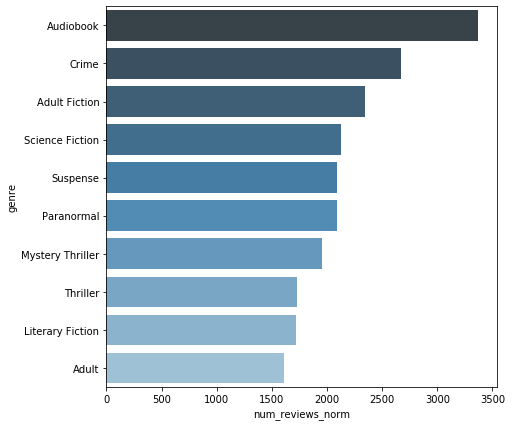

In [75]:
genre_rating.sort_values(by="num_reviews_norm", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_reviews_norm", y="genre", data=genre_rating.head(10), palette="Blues_d")
genre_rating.head(10)

normalised for number of books

,genre,average_rating,num_reviews,num_ratings,num_books,num_reviews_norm,num_ratings_norm
6,Audiobook,3.993918,327162,3200462,97,3372.804124,32994.453608
16,Science Fiction,3.968205,83052,1158290,39,2129.538462,29699.743590
23,Paranormal,4.072000,31330,437727,15,2088.666667,29181.800000
17,Crime,4.007576,88063,857999,33,2668.575758,25999.969697
15,Adult Fiction,3.927077,152601,1404242,65,2347.707692,21603.723077
14,Suspense,3.957292,100462,907768,48,2092.958333,18911.833333
25,Literary Fiction,3.934667,77234,762904,45,1716.311111,16953.422222
5,Fantasy,3.971136,134044,1489051,88,1523.227273,16921.034091
8,Adult,3.957105,366299,3425540,228,1606.574561,15024.298246
1,Contemporary,3.990354,297946,2827967,198,1504.777778,14282.661616


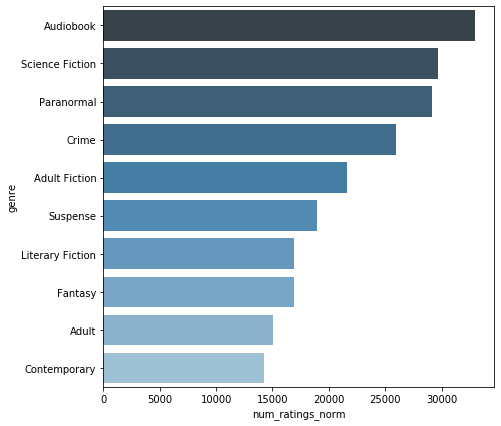

In [76]:
genre_rating.sort_values(by="num_ratings_norm", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_ratings_norm", y="genre", data=genre_rating.head(10),palette="Blues_d")
genre_rating.head(10)

,genre,average_rating,num_reviews,num_ratings
26,New Adult,4.210500,28060,152608
27,War,4.149545,10315,57307
24,Memoir,4.115000,14945,123185
11,Nonfiction,4.101186,25284,225938
21,Cultural,4.097576,26040,157550
22,Autobiography,4.088710,15003,125455
13,Contemporary Romance,4.081273,43797,249361
23,Paranormal,4.072000,31330,437727
2,Romance,4.061558,167339,1173653
10,Historical Fiction,4.037011,95574,640824


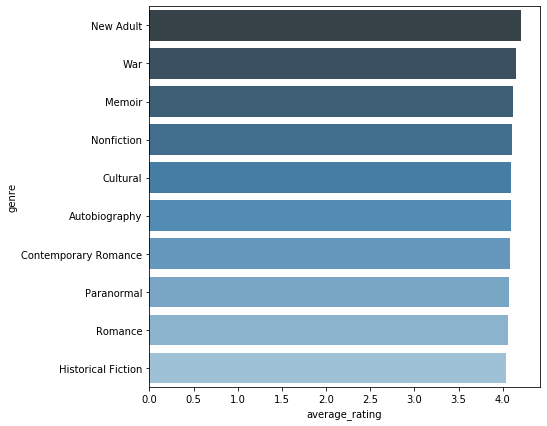

In [32]:
genre_rating.sort_values(by="average_rating", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="average_rating", y="genre", data=genre_rating.head(10), palette="Blues_d")
genre_rating.head(10)

# Hottest books
* Popularity of books during corona in relationship to their age
* Ratings and reviews per day

In [33]:
df["num_reviews_normalized"] = df["num_reviews"] / df["age"]
df["num_ratings_normalized"] = df["num_ratings"] / df["age"]
df.head()

,Unnamed: 0,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,...,Memoir,Literary Fiction,New Adult,War,Biography,Magic,has_award,is_series,num_reviews_normalized,num_ratings_normalized
2016,2419,https://www.goodreads.com/book/show/50606451-d...,Doctor Dearest,R.S. Grey,4763,550,3.86,NaN,English,2020-02-06,...,False,False,False,False,False,False,False,False,4.824561,41.780702
2020,2423,https://www.goodreads.com/book/show/48730204-pike,Pike,T.M. Frazier,1061,272,4.41,248.0,English,2020-03-24,...,False,False,False,False,False,False,False,True,4.059701,15.835821
2022,2425,https://www.goodreads.com/book/show/43352294-t...,The Tourist Attraction,Sarah Morgenthaler,789,320,3.70,352.0,English,2020-05-05,...,False,False,False,False,False,False,False,True,12.800000,31.560000
2023,2426,https://www.goodreads.com/book/show/52205544-s...,Sweet Sorrow,David Nicholls,5496,605,3.87,416.0,English,2020-05-05,...,False,False,False,False,False,False,False,False,24.200000,219.840000
2024,2427,https://www.goodreads.com/book/show/52670680-a...,A Deadly Inside Scoop,Abby Collette,113,89,4.00,384.0,NaN,2020-05-12,...,False,False,False,False,False,False,False,True,4.944444,6.277778


## Hot books should have at least more than the average amount of reviews

In [38]:
df_moreThanMeanRatings_normalized = df[df["num_ratings_normalized"] > df.num_ratings_normalized.mean()]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_ratings_normalized,avg_rating,num_reviews_normalized
2433,House of Earth and Blood,509.659091,4.47,104.556818
2492,In An Instant,245.966667,4.40,26.044444
2271,A Secret for a Secret,223.277778,4.34,41.833333
2289,The Hunter,366.000000,4.33,69.684211
2497,Untamed,386.493827,4.31,48.629630
2313,Beach Read,1003.727273,4.29,250.181818
2321,Walk the Wire,217.615385,4.28,16.410256
2452,The Island of Sea Women,443.543210,4.25,65.185185
2777,The Tibetan Book of Living and Dying,247.094737,4.22,6.978947
2340,If It Bleeds,245.846154,4.22,36.153846


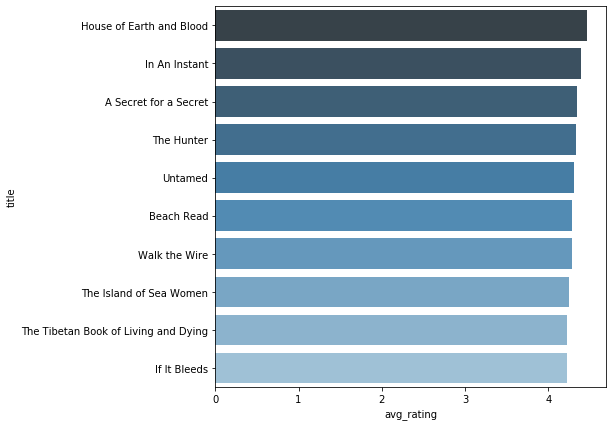

In [39]:
df_moreThanMeanRatings_normalized.sort_values(by="avg_rating", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="avg_rating", y="title", data=df_moreThanMeanRatings_normalized.head(10), palette="Blues_d")
df_moreThanMeanRatings_normalized.head(10)[["title","num_ratings_normalized","avg_rating","num_reviews_normalized"]]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_ratings_normalized,avg_rating,num_reviews_normalized,age
2302,The Annotated American Gods,15850.239130,4.11,815.195652,46.0
2493,Little Fires Everywhere,7928.905405,4.10,614.202703,74.0
2239,The Iron King,7315.800000,3.90,464.640000,25.0
2457,The Woman in the Window,6515.800000,3.94,634.366667,60.0
2167,Defending Jacob,6322.076923,3.98,513.871795,39.0
2288,The Turn of the Key,5208.388889,3.95,706.500000,18.0
2105,The Angel Experiment,5171.846154,4.08,236.923077,39.0
2296,"Ask Again, Yes",3370.920000,4.01,346.480000,25.0
2748,Normal People,2619.078431,3.87,234.529412,102.0
2689,All the Bright Places,2322.853448,4.17,268.758621,116.0


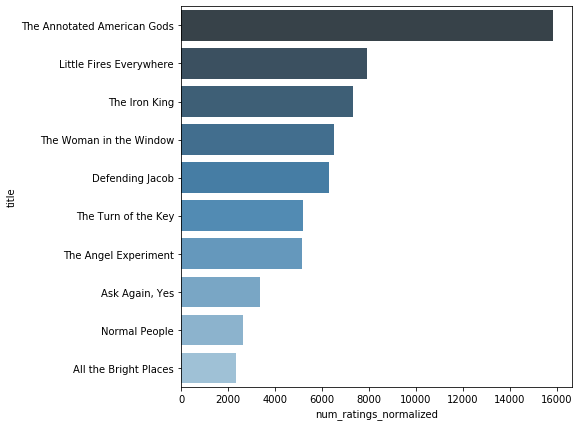

In [36]:
df_moreThanMeanRatings_normalized.sort_values(by="num_ratings_normalized", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_ratings_normalized", y="title", data=df_moreThanMeanRatings_normalized.head(10), palette="Blues_d")
df_moreThanMeanRatings_normalized.head(10)[["title","num_ratings_normalized","avg_rating","num_reviews_normalized","age"]]

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,num_ratings_normalized,avg_rating,num_reviews_normalized,age
2302,The Annotated American Gods,15850.239130,4.11,815.195652,46.0
2288,The Turn of the Key,5208.388889,3.95,706.500000,18.0
2457,The Woman in the Window,6515.800000,3.94,634.366667,60.0
2493,Little Fires Everywhere,7928.905405,4.10,614.202703,74.0
2167,Defending Jacob,6322.076923,3.98,513.871795,39.0
2239,The Iron King,7315.800000,3.90,464.640000,25.0
2296,"Ask Again, Yes",3370.920000,4.01,346.480000,25.0
2762,Daisy Jones & The Six,1799.913793,4.21,275.275862,116.0
2689,All the Bright Places,2322.853448,4.17,268.758621,116.0
2313,Beach Read,1003.727273,4.29,250.181818,11.0


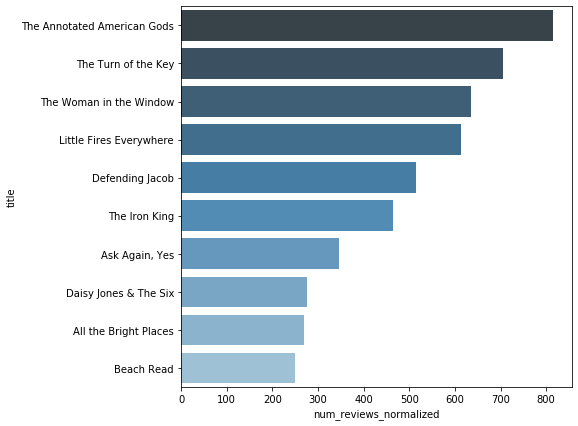

In [37]:
df_moreThanMeanRatings_normalized.sort_values(by="num_reviews_normalized", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_reviews_normalized", y="title", data=df_moreThanMeanRatings_normalized.head(10), palette="Blues_d")
df_moreThanMeanRatings_normalized.head(10)[["title","num_ratings_normalized","avg_rating","num_reviews_normalized","age"]]

## Single value hotness score
$$hotness = (\frac{reviews/day_{book}}{reviews/day_{ensemble-average}} + \frac{ratings/day_{book}}{ratings/day_{ensemble-average}})\times \frac{rating_{book}}{rating_{ensemble-average}}$$


In [51]:
df_moreThanMeanRatings_normalized.loc[:,['age', 'fraction_review_hot']]


,age,fraction_review_hot
2433,88.0,1.603997
2492,90.0,0.399545
2271,18.0,0.641761
2289,19.0,1.069019
2497,81.0,0.746023
2313,11.0,3.838017
2321,39.0,0.251748
2452,81.0,1.000000
2777,95.0,0.107063
2340,39.0,0.554633


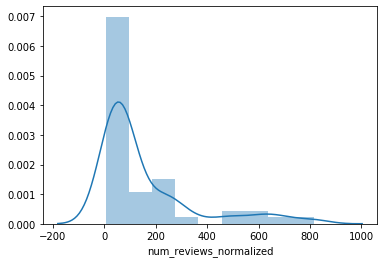

In [49]:
sns.distplot(df_moreThanMeanRatings_normalized.num_reviews_normalized)

In [50]:
df_moreThanMeanRatings_normalized["fraction_review_hot"] = (df_moreThanMeanRatings_normalized["num_reviews_normalized"]/df_moreThanMeanRatings_normalized.num_reviews_normalized.median())

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_moreThanMeanRatings_normalized["hotness"] = (((df_moreThanMeanRatings_normalized["num_reviews_normalized"]/df_moreThanMeanRatings_normalized.num_reviews_normalized.median()) 
                                                 + (df_moreThanMeanRatings_normalized["num_ratings_normalized"]/df_moreThanMeanRatings_normalized.num_ratings_normalized.median())) 
                                                * df_moreThanMeanRatings_normalized["avg_rating"] / df_moreThanMeanRatings_normalized.avg_rating.median() )

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,hotness,num_ratings_normalized,avg_rating,num_reviews_normalized,age
2302,The Annotated American Gods,48.956031,15850.239130,4.11,815.195652,46.0
2493,Little Fires Everywhere,27.635735,7928.905405,4.10,614.202703,74.0
2457,The Woman in the Window,23.758784,6515.800000,3.94,634.366667,60.0
2239,The Iron King,22.747107,7315.800000,3.90,464.640000,25.0
2288,The Turn of the Key,22.023482,5208.388889,3.95,706.500000,18.0
2167,Defending Jacob,21.754225,6322.076923,3.98,513.871795,39.0
2105,The Angel Experiment,15.408209,5171.846154,4.08,236.923077,39.0
2296,"Ask Again, Yes",12.787741,3370.920000,4.01,346.480000,25.0
2689,All the Bright Places,9.637376,2322.853448,4.17,268.758621,116.0
2748,Normal People,9.080448,2619.078431,3.87,234.529412,102.0


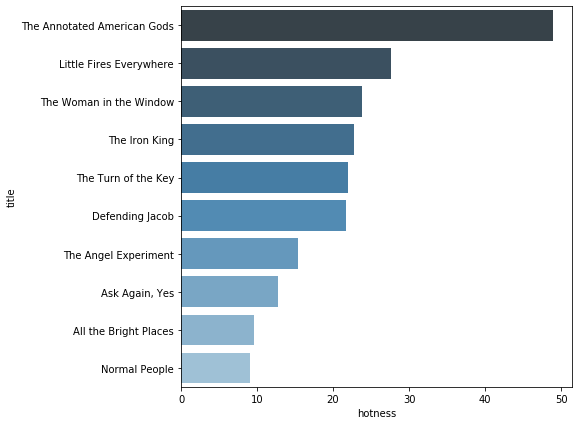

In [78]:
df_moreThanMeanRatings_normalized.sort_values(by="hotness", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="hotness", y="title", data=df_moreThanMeanRatings_normalized.head(10), palette="Blues_d")
df_moreThanMeanRatings_normalized.head(10)[["title","hotness","num_ratings_normalized","avg_rating","num_reviews_normalized","age"]]

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="num_reviews", y="title", data=df_moreThanMeanRatings.head(10), palette="Blues_d")
df_moreThanMeanRatings.head(10)[["title","num_reviews","num_ratings","avg_rating"]]